The decision trees can be divided, with respect to the **target values**, into:

Classification trees used to classify samples, assign to a limited set of values - **classes**. In scikit-learn it is **DecisionTreeClassifier**.
Regression trees used to assign samples into **numerical values within the range**. In scikit-learn it is **DecisionTreeRegressor.**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("/content/gdrive/MyDrive/Research project/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
inputs=df.drop('salary_more_then_100k', axis='columns')
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [5]:
target=df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

**How should we handle categorical variables?**

1.   Label Encoding
2.   One-Hot Encoding


In [6]:
#Use Label Encoding class to convert input text values into number class
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()


In [7]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_job.fit_transform(inputs['job'])
inputs['degree_n']=le_job.fit_transform(inputs['degree'])

In [8]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


**Note:**inplace=True(If not used the New variable otherwise same dataframe)

inputs.drop(['company','job','degree'],axis='columns',inplace=True)


In [9]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')

In [10]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [11]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [12]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [13]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [14]:
model.score(inputs_n,target)

1.0

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

In [15]:
model.predict([[2,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

In [16]:
model.predict([[2,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

Below I show **4 ways to visualize Decision Tree in Python:**



1.   print text representation of the tree with **sklearn.tree.export_text method**
2.   plot with **sklearn.tree.plot_tree method (matplotlib needed)**
3.   plot with **sklearn.tree.export_graphviz method (graphviz needed)**
4.   plot with **dtreeviz package (dtreeviz and graphviz needed)**



In [17]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_0 <= 1.50
|   |   |--- class: 1
|   |--- feature_0 >  1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |--- class: 0



**To save the figure to the .png file:**

fig.savefig("decistion_tree.png")

**Note:** filled=True used for color

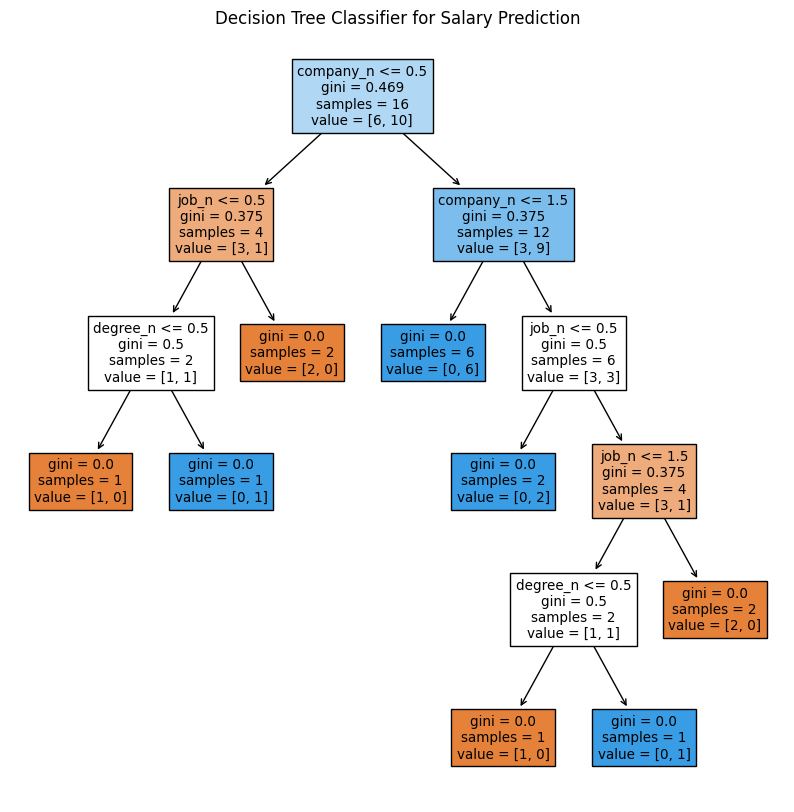

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model, feature_names=inputs_n.columns, ax=ax, filled=True)
plt.title("Decision Tree Classifier for Salary Prediction")
plt.show()

In [36]:
import graphviz


# Export the decision tree to a DOT file
dot_data = tree.export_graphviz(model, out_file=None, feature_names=inputs_n.columns, class_names=['<= 100k', '> 100k'],filled=True)

# Create a graphviz graph
graph = graphviz.Source(dot_data)

# Render the graph to a PNG image
#graph.render("decision_tree.png")

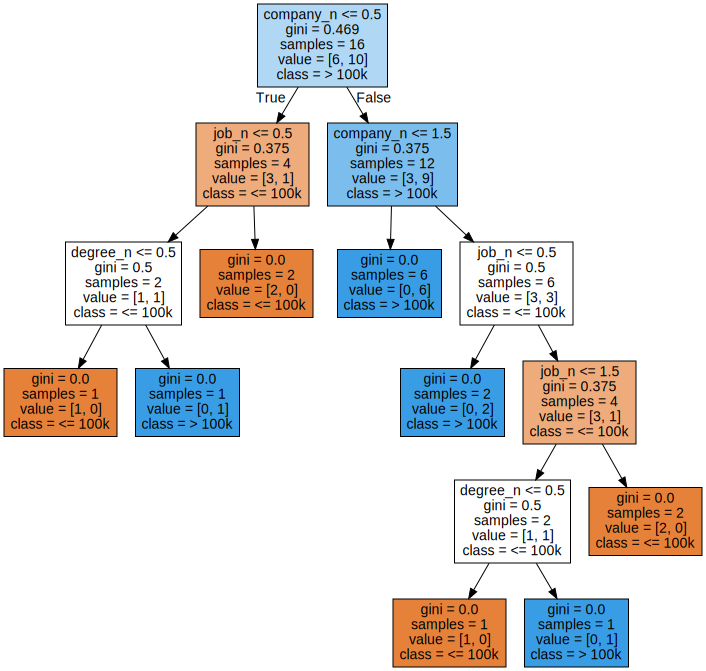

In [37]:
graph